<a href="https://colab.research.google.com/github/joohoshin/MLDL_Basic/blob/master/9_1_%ED%80%B4%EC%A6%88_%EB%A6%AC%EB%B7%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 모델링

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# species를 숫자로 바꾸기
def species(name):
  if name=='setosa': return 1
  if name=='versicolor': return 2
  if name=='virginica': return 3

iris['species_code'] = iris.species.apply(species)

In [ ]:
iris.drop('species',axis=1, inplace=True)

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_code
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


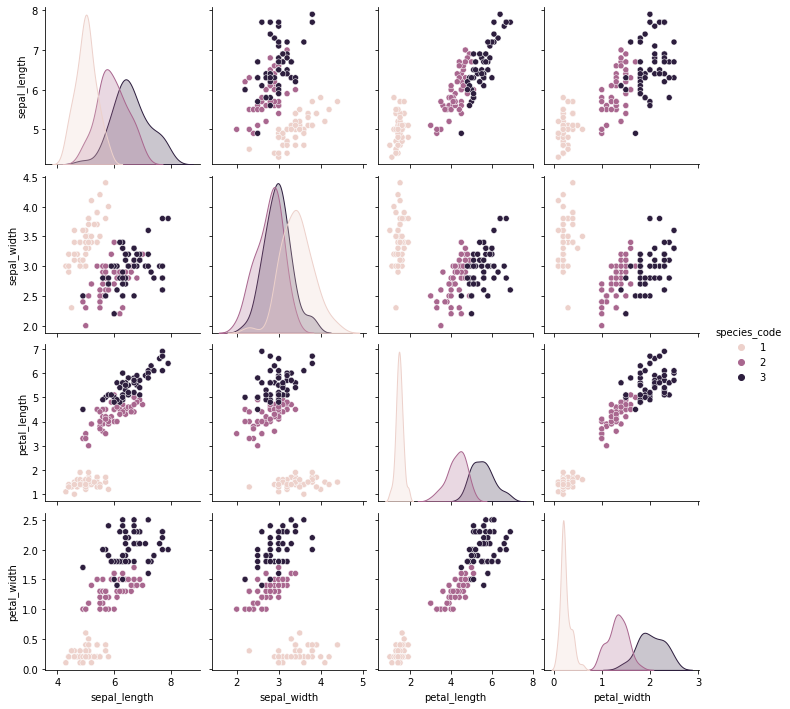

In [ ]:
sns.pairplot(iris, hue='species_code')

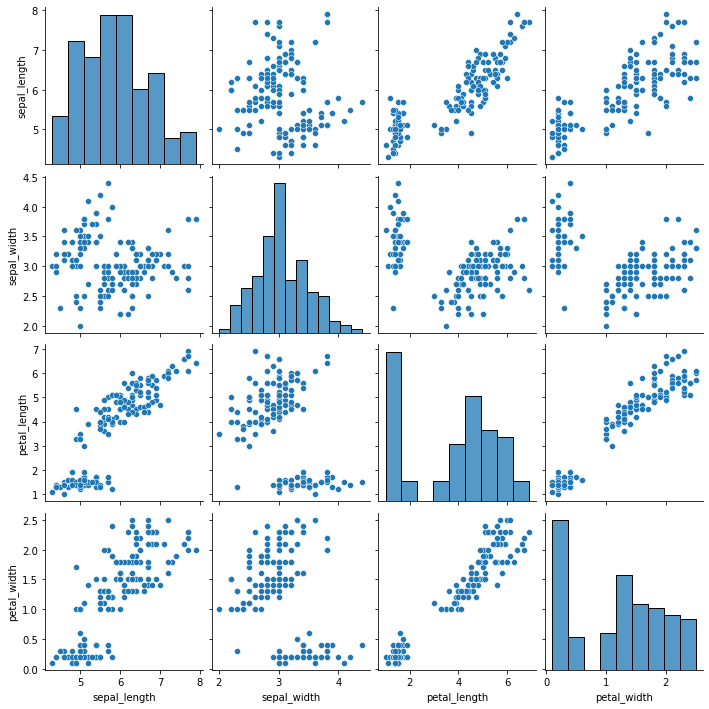

In [ ]:
sns.pairplot(iris.iloc[:,:-1])

In [ ]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='species_code ~ sepal_length + sepal_width + petal_length + petal_width', data=iris).fit()  
lm.summary() # 기본적인 통계치 출력

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           species_code   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     484.5
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           8.46e-83
Time:                        18:50:40   Log-Likelihood:                 17.437
No. Observations:                 150   AIC:                            -24.87
Df Residuals:                     145   BIC:                            -9.821
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1865      0.205      5.792      0.000       0.782       1.591
sepal_length    -0.1119      0.058     -1.941      0.054      -0.226       0.002
sepal_width     -0.0401      0.060     -0.671      0.503      -0.158       0.078
petal_length     0.2286      0.057      4.022      0.000       0.116       0.341
petal_width      0.6093      0.094      6.450      0.000       0.423       0.796
==============================================================================
Omnibus:                        0.374   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.829   Jarque-Bera (JB):                0.141
Skew:                          -0.051   Prob(JB):                        0.932
Kurtosis:                       3.110   Cond. No.                         91.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
data = {'sepal_length':[7,6,5],'sepal_width':[2,3,4],'petal_length':[2,3,4], 'petal_width':[1,2,3] }

In [ ]:
pd.DataFrame(data)

,sepal_length,sepal_width,petal_length,petal_width
0,7,2,2,1
1,6,3,3,2
2,5,4,4,3


In [ ]:
lm.predict(data)

0    1.389537
1    2.299261
2    3.208984
dtype: float64

# 2. 건강검진 데이터 분석

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144617 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


https://www.data.go.kr/data/15007122/fileData.do

건강검진 데이터 

In [ ]:
import pandas as pd

In [ ]:
nhis2018 = pd.read_csv('/content/drive/My Drive/ML_DL_202002/NHIS_OPEN_GJ_2018.csv')
nhis2017 = pd.read_csv('/content/drive/My Drive/ML_DL_202002/NHIS_OPEN_GJ_2018.csv')
nhis2016 = pd.read_csv('/content/drive/My Drive/ML_DL_202002/NHIS_OPEN_GJ_2018.csv')

In [ ]:
print(nhis2018.columns)
print(nhis2017.columns)
print(nhis2016.columns)

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')
Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')
Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공

In [ ]:
raw_df = pd.concat([nhis2018, nhis2017, nhis2016], ignore_index=True)

In [ ]:
raw_df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2018,1,2,7,48,160,60,79.5,1.5,1.5,1.0,1.0,110.0,60.0,96.0,NaN,NaN,NaN,NaN,12.8,1.0,0.5,21.0,8.0,12.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219
1,2018,2,1,6,26,170,55,69.3,1.2,0.8,1.0,1.0,128.0,78.0,79.0,NaN,NaN,NaN,NaN,15.9,1.0,1.0,35.0,45.0,47.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
2,2018,3,1,12,28,165,70,85.0,0.8,0.8,2.0,1.0,128.0,65.0,80.0,NaN,NaN,NaN,NaN,12.5,NaN,1.1,77.0,47.0,21.0,2.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
3,2018,4,2,15,27,150,45,71.5,0.4,0.3,1.0,1.0,151.0,89.0,100.0,234.0,90.0,80.0,135.0,12.7,1.0,0.6,19.0,10.0,13.0,1.0,NaN,1,0.0,NaN,NaN,NaN,0.0,20191219
4,2018,5,2,14,41,145,50,77.0,0.7,0.6,1.0,1.0,114.0,62.0,124.0,NaN,NaN,NaN,NaN,11.6,1.0,0.5,26.0,26.0,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219


In [ ]:
raw_df.loc[0]

기준년도                2018.0
가입자일련번호                1.0
성별코드                   2.0
연령대코드(5세단위)            7.0
시도코드                  48.0
신장(5Cm단위)            160.0
체중(5Kg단위)             60.0
허리둘레                  79.5
시력(좌)                  1.5
시력(우)                  1.5
청력(좌)                  1.0
청력(우)                  1.0
수축기혈압                110.0
이완기혈압                 60.0
식전혈당(공복혈당)            96.0
총콜레스테롤                 NaN
트리글리세라이드               NaN
HDL콜레스테롤               NaN
LDL콜레스테롤               NaN
혈색소                   12.8
요단백                    1.0
혈청크레아티닌                0.5
(혈청지오티)AST            21.0
(혈청지오티)ALT             8.0
감마지티피                 12.0
흡연상태                   1.0
음주여부                   NaN
구강검진수검여부               0.0
치아우식증유무                NaN
결손치유무                  NaN
치아마모증유무                NaN
제3대구치(사랑니)이상           NaN
치석                     NaN
데이터공개일자         20191219.0
Name: 0, dtype: float64

흡연 음주 연령과 BMI(체중/신장(m)^2)


In [ ]:
raw_df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [ ]:
df = raw_df.copy()

In [ ]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2018,1,2,7,48,160,60,79.5,1.5,1.5,1.0,1.0,110.0,60.0,96.0,NaN,NaN,NaN,NaN,12.8,1.0,0.5,21.0,8.0,12.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219
1,2018,2,1,6,26,170,55,69.3,1.2,0.8,1.0,1.0,128.0,78.0,79.0,NaN,NaN,NaN,NaN,15.9,1.0,1.0,35.0,45.0,47.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
2,2018,3,1,12,28,165,70,85.0,0.8,0.8,2.0,1.0,128.0,65.0,80.0,NaN,NaN,NaN,NaN,12.5,NaN,1.1,77.0,47.0,21.0,2.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
3,2018,4,2,15,27,150,45,71.5,0.4,0.3,1.0,1.0,151.0,89.0,100.0,234.0,90.0,80.0,135.0,12.7,1.0,0.6,19.0,10.0,13.0,1.0,NaN,1,0.0,NaN,NaN,NaN,0.0,20191219
4,2018,5,2,14,41,145,50,77.0,0.7,0.6,1.0,1.0,114.0,62.0,124.0,NaN,NaN,NaN,NaN,11.6,1.0,0.5,26.0,26.0,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219


In [ ]:
# 데이터 타입 확인
# 코드 등은 단순 숫자로 변환 (category 형태로는 변환 안 함)

df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진수검여부          int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

In [ ]:
# null 데이터 확인
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레               1242
시력(좌)               759
시력(우)               798
청력(좌)               651
청력(우)               651
수축기혈압             17190
이완기혈압             17190
식전혈당(공복혈당)        17745
총콜레스테롤          2001732
트리글리세라이드        2001756
HDL콜레스테롤        2001762
LDL콜레스테롤        2022366
혈색소               17742
요단백               31710
혈청크레아티닌           17718
(혈청지오티)AST        17718
(혈청지오티)ALT        17718
감마지티피             17727
흡연상태                702
음주여부            1064829
구강검진수검여부              0
치아우식증유무         1800024
결손치유무           3000000
치아마모증유무         3000000
제3대구치(사랑니)이상    3000000
치석              1800021
데이터공개일자               0
dtype: int64

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2018,1,2,7,48,160,60,79.5,1.5,1.5,1.0,1.0,110.0,60.0,96.0,NaN,NaN,NaN,NaN,12.8,1.0,0.5,21.0,8.0,12.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219
1,2018,2,1,6,26,170,55,69.3,1.2,0.8,1.0,1.0,128.0,78.0,79.0,NaN,NaN,NaN,NaN,15.9,1.0,1.0,35.0,45.0,47.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
2,2018,3,1,12,28,165,70,85.0,0.8,0.8,2.0,1.0,128.0,65.0,80.0,NaN,NaN,NaN,NaN,12.5,NaN,1.1,77.0,47.0,21.0,2.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
3,2018,4,2,15,27,150,45,71.5,0.4,0.3,1.0,1.0,151.0,89.0,100.0,234.0,90.0,80.0,135.0,12.7,1.0,0.6,19.0,10.0,13.0,1.0,NaN,1,0.0,NaN,NaN,NaN,0.0,20191219
4,2018,5,2,14,41,145,50,77.0,0.7,0.6,1.0,1.0,114.0,62.0,124.0,NaN,NaN,NaN,NaN,11.6,1.0,0.5,26.0,26.0,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2018,999996,2,11,41,165,75,84.0,1.2,1.2,1.0,1.0,110.0,70.0,107.0,NaN,NaN,NaN,NaN,12.2,1.0,0.7,18.0,15.0,19.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219
2999996,2018,999997,1,7,41,170,75,88.0,2.0,2.0,1.0,1.0,136.0,88.0,114.0,NaN,NaN,NaN,NaN,17.0,1.0,1.0,25.0,36.0,90.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219
2999997,2018,999998,1,8,41,175,80,87.0,1.2,1.2,1.0,1.0,162.0,90.0,98.0,NaN,NaN,NaN,NaN,16.4,1.0,0.9,21.0,15.0,36.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219
2999998,2018,999999,1,11,41,165,70,80.2,0.9,1.2,1.0,1.0,140.0,98.0,94.0,NaN,NaN,NaN,NaN,15.7,1.0,1.2,20.0,18.0,14.0,2.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219


In [ ]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [ ]:
# 신장 변환 (BMI 구하기 위해서)
df = df.assign(신장 = df['신장(5Cm단위)']+3)

In [ ]:
df['신장'] = df['신장(5Cm단위)']+3

In [ ]:
# 체중 변환
df = df.assign(체중 = df['체중(5Kg단위)']+3)

In [ ]:
# BMI 계산
df = df.assign(BMI = df.체중/(df.신장/100)**2)

In [ ]:
df

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,신장,체중,BMI
0,2018,1,2,7,48,160,60,79.5,1.5,1.5,1.0,1.0,110.0,60.0,96.0,NaN,NaN,NaN,NaN,12.8,1.0,0.5,21.0,8.0,12.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219,163,63,23.711845
1,2018,2,1,6,26,170,55,69.3,1.2,0.8,1.0,1.0,128.0,78.0,79.0,NaN,NaN,NaN,NaN,15.9,1.0,1.0,35.0,45.0,47.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219,173,58,19.379197
2,2018,3,1,12,28,165,70,85.0,0.8,0.8,2.0,1.0,128.0,65.0,80.0,NaN,NaN,NaN,NaN,12.5,NaN,1.1,77.0,47.0,21.0,2.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219,168,73,25.864512
3,2018,4,2,15,27,150,45,71.5,0.4,0.3,1.0,1.0,151.0,89.0,100.0,234.0,90.0,80.0,135.0,12.7,1.0,0.6,19.0,10.0,13.0,1.0,NaN,1,0.0,NaN,NaN,NaN,0.0,20191219,153,48,20.504934
4,2018,5,2,14,41,145,50,77.0,0.7,0.6,1.0,1.0,114.0,62.0,124.0,NaN,NaN,NaN,NaN,11.6,1.0,0.5,26.0,26.0,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219,148,53,24.196494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2018,999996,2,11,41,165,75,84.0,1.2,1.2,1.0,1.0,110.0,70.0,107.0,NaN,NaN,NaN,NaN,12.2,1.0,0.7,18.0,15.0,19.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219,168,78,27.636054
2999996,2018,999997,1,7,41,170,75,88.0,2.0,2.0,1.0,1.0,136.0,88.0,114.0,NaN,NaN,NaN,NaN,17.0,1.0,1.0,25.0,36.0,90.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219,173,78,26.061679
2999997,2018,999998,1,8,41,175,80,87.0,1.2,1.2,1.0,1.0,162.0,90.0,98.0,NaN,NaN,NaN,NaN,16.4,1.0,0.9,21.0,15.0,36.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219,178,83,26.196187
2999998,2018,999999,1,11,41,165,70,80.2,0.9,1.2,1.0,1.0,140.0,98.0,94.0,NaN,NaN,NaN,NaN,15.7,1.0,1.2,20.0,18.0,14.0,2.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219,168,73,25.864512


In [ ]:
# 연령을 수치로 변환 (평균값 사용)
age_group = list(range(3,89, 5))
print(len(age_group))
age_group

18


[3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88]

In [ ]:
# 연령을 중간값으로 대체
def age(code):
  return age_group[code-1]

In [ ]:
df['연령'] = df['연령대코드(5세단위)'].apply(age)

In [ ]:
df

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,신장,체중,BMI,연령
0,2018,1,2,7,48,160,60,79.5,1.5,1.5,1.0,1.0,110.0,60.0,96.0,NaN,NaN,NaN,NaN,12.8,1.0,0.5,21.0,8.0,12.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219,163,63,23.711845,33
1,2018,2,1,6,26,170,55,69.3,1.2,0.8,1.0,1.0,128.0,78.0,79.0,NaN,NaN,NaN,NaN,15.9,1.0,1.0,35.0,45.0,47.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219,173,58,19.379197,28
2,2018,3,1,12,28,165,70,85.0,0.8,0.8,2.0,1.0,128.0,65.0,80.0,NaN,NaN,NaN,NaN,12.5,NaN,1.1,77.0,47.0,21.0,2.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219,168,73,25.864512,58
3,2018,4,2,15,27,150,45,71.5,0.4,0.3,1.0,1.0,151.0,89.0,100.0,234.0,90.0,80.0,135.0,12.7,1.0,0.6,19.0,10.0,13.0,1.0,NaN,1,0.0,NaN,NaN,NaN,0.0,20191219,153,48,20.504934,73
4,2018,5,2,14,41,145,50,77.0,0.7,0.6,1.0,1.0,114.0,62.0,124.0,NaN,NaN,NaN,NaN,11.6,1.0,0.5,26.0,26.0,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219,148,53,24.196494,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2018,999996,2,11,41,165,75,84.0,1.2,1.2,1.0,1.0,110.0,70.0,107.0,NaN,NaN,NaN,NaN,12.2,1.0,0.7,18.0,15.0,19.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219,168,78,27.636054,53
2999996,2018,999997,1,7,41,170,75,88.0,2.0,2.0,1.0,1.0,136.0,88.0,114.0,NaN,NaN,NaN,NaN,17.0,1.0,1.0,25.0,36.0,90.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219,173,78,26.061679,33
2999997,2018,999998,1,8,41,175,80,87.0,1.2,1.2,1.0,1.0,162.0,90.0,98.0,NaN,NaN,NaN,NaN,16.4,1.0,0.9,21.0,15.0,36.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219,178,83,26.196187,38
2999998,2018,999999,1,11,41,165,70,80.2,0.9,1.2,1.0,1.0,140.0,98.0,94.0,NaN,NaN,NaN,NaN,15.7,1.0,1.2,20.0,18.0,14.0,2.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219,168,73,25.864512,53


In [ ]:
df = df.drop(['연령대코드(5세단위)', '체중(5Kg단위)', '신장(5Cm단위)'], axis=1)

In [ ]:
df

,기준년도,가입자일련번호,성별코드,시도코드,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,신장,체중,BMI,연령
0,2018,1,2,48,79.5,1.5,1.5,1.0,1.0,110.0,60.0,96.0,NaN,NaN,NaN,NaN,12.8,1.0,0.5,21.0,8.0,12.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219,163,63,23.711845,33
1,2018,2,1,26,69.3,1.2,0.8,1.0,1.0,128.0,78.0,79.0,NaN,NaN,NaN,NaN,15.9,1.0,1.0,35.0,45.0,47.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219,173,58,19.379197,28
2,2018,3,1,28,85.0,0.8,0.8,2.0,1.0,128.0,65.0,80.0,NaN,NaN,NaN,NaN,12.5,NaN,1.1,77.0,47.0,21.0,2.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219,168,73,25.864512,58
3,2018,4,2,27,71.5,0.4,0.3,1.0,1.0,151.0,89.0,100.0,234.0,90.0,80.0,135.0,12.7,1.0,0.6,19.0,10.0,13.0,1.0,NaN,1,0.0,NaN,NaN,NaN,0.0,20191219,153,48,20.504934,73
4,2018,5,2,41,77.0,0.7,0.6,1.0,1.0,114.0,62.0,124.0,NaN,NaN,NaN,NaN,11.6,1.0,0.5,26.0,26.0,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219,148,53,24.196494,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2018,999996,2,41,84.0,1.2,1.2,1.0,1.0,110.0,70.0,107.0,NaN,NaN,NaN,NaN,12.2,1.0,0.7,18.0,15.0,19.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219,168,78,27.636054,53
2999996,2018,999997,1,41,88.0,2.0,2.0,1.0,1.0,136.0,88.0,114.0,NaN,NaN,NaN,NaN,17.0,1.0,1.0,25.0,36.0,90.0,1.0,1.0,1,0.0,NaN,NaN,NaN,0.0,20191219,173,78,26.061679,33
2999997,2018,999998,1,41,87.0,1.2,1.2,1.0,1.0,162.0,90.0,98.0,NaN,NaN,NaN,NaN,16.4,1.0,0.9,21.0,15.0,36.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20191219,178,83,26.196187,38
2999998,2018,999999,1,41,80.2,0.9,1.2,1.0,1.0,140.0,98.0,94.0,NaN,NaN,NaN,NaN,15.7,1.0,1.2,20.0,18.0,14.0,2.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20191219,168,73,25.864512,53


In [ ]:
BMI_smoke_male = pd.pivot_table(df[df.성별코드==1], values='BMI', index=['연령'],
                    columns=['흡연상태'], aggfunc='mean')

In [ ]:
BMI_smoke_male

흡연상태,1.0,2.0,3.0
연령,,,
23,23.868029,24.064240,24.022957
28,24.608673,24.984764,25.060812
33,25.165421,25.545267,25.606519
38,25.329366,25.586145,25.568360
43,25.213018,25.514423,25.286013
48,25.075538,25.385975,24.970919
53,24.959002,25.211087,24.619383
58,24.760880,24.990570,24.214326
63,24.682310,24.886016,24.023508


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text

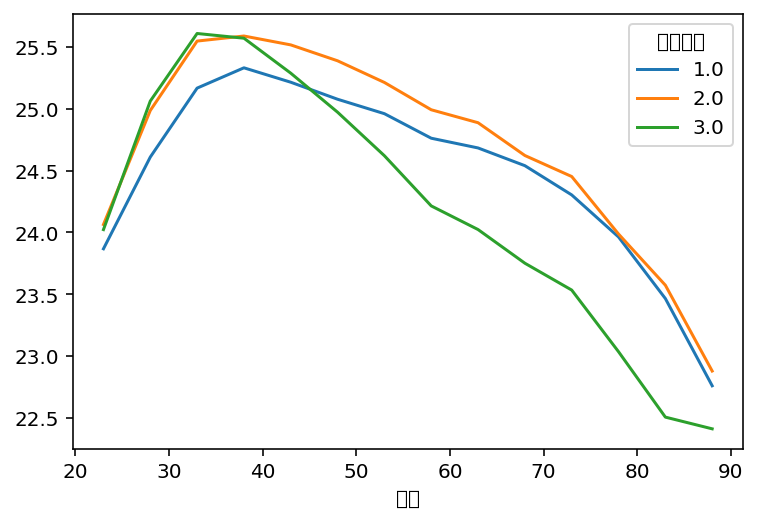

In [ ]:
BMI_smoke_male.plot()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text

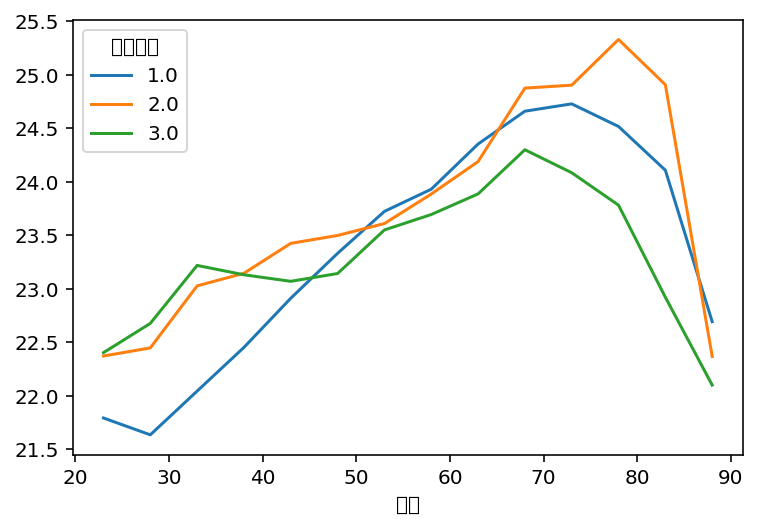

In [ ]:
BMI_smoke_female = pd.pivot_table(df[df.성별코드==2], values='BMI', index=['연령'],
                    columns=['흡연상태'], aggfunc='mean')
BMI_smoke_female.plot()